# Практическое занятие: Проверка статистических гипотез

## Введение

В этом практическом занятии вы научитесь применять различные методы проверки статистических гипотез на реальных примерах. Мы рассмотрим:

1. Одновыборочный t-тест
2. Двухвыборочный t-тест
3. Тест хи-квадрат
4. Однофакторный дисперсионный анализ (ANOVA)

### Цели занятия:
- Научиться формулировать статистические гипотезы
- Освоить применение различных статистических тестов
- Научиться интерпретировать результаты тестов
- Получить практический опыт анализа данных

### Требования:
- Базовое понимание статистики
- Знание Python и основных библиотек для анализа данных
- Jupyter Notebook

## 1. Подготовка к работе

Сначала импортируем необходимые библиотеки и создадим тестовые наборы данных для наших упражнений.

In [2]:
# 📈 Импорт всех необходимых инструментов для анализа
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns # Для красивой визуализации

# Установка глобальных настроек стиля для графиков
plt.style.use('ggplot')
sns.set_context("notebook", font_scale=1.1)

# Фиксация зерна случайности для воспроизводимости (Magic Number 13)
GLOBAL_SEED = 13
np.random.seed(GLOBAL_SEED)

# Генерация уникальных наборов данных (Аналогично исходным)

# 1. Данные для одновыборочного t-теста
# Тест на средний вес (кг)
TARGET_MEAN_WEIGHT = 70
weight_sample = np.random.normal(loc=TARGET_MEAN_WEIGHT + 2, scale=8, size=120)

# 2. Данные для двухвыборочного t-теста
# Сравнение эффективности двух препаратов (время восстановления в днях)
RECOVERY_A = np.random.normal(loc=6.5, scale=1.5, size=60)
RECOVERY_B = np.random.normal(loc=7.2, scale=1.5, size=60)

# 3. Данные для теста хи-квадрат
# Связь между типом устройства и подпиской на рассылку
device_type = np.random.choice(['Mobile', 'Desktop', 'Tablet'], size=150)
email_signup = np.random.choice(['Subscribed', 'Not Subscribed'], size=150)

# 4. Данные для ANOVA
# Сравнение продаж (тыс. руб.) по трем рекламным кампаниям
CAMPAIGN_1 = np.random.normal(loc=55, scale=7, size=40)
CAMPAIGN_2 = np.random.normal(loc=60, scale=7, size=40)
CAMPAIGN_3 = np.random.normal(loc=65, scale=7, size=40)

print("✅ Данные сгенерированы и библиотеки импортированы.")

✅ Данные сгенерированы и библиотеки импортированы.


## 2. Одновыборочный t-тест

### Теория
Одновыборочный t-тест используется для проверки гипотезы о том, что среднее значение выборки статистически значимо отличается от известного или предполагаемого значения генеральной совокупности.

### Пример: Рост студентов
Предположим, что средний рост студентов в стране составляет 100 см. Мы хотим проверить, отличается ли средний рост в нашей выборке от этого значения.

#### Формулировка гипотез:
- H₀: μ = 100 (средний рост равен 100 см)
- H₁: μ ≠ 100 (средний рост не равен 100 см)

🔬 Описательная статистика выборки:
Выборочное среднее: 71.95 кг
Выборочное Ст.Откл.: 7.43 кг


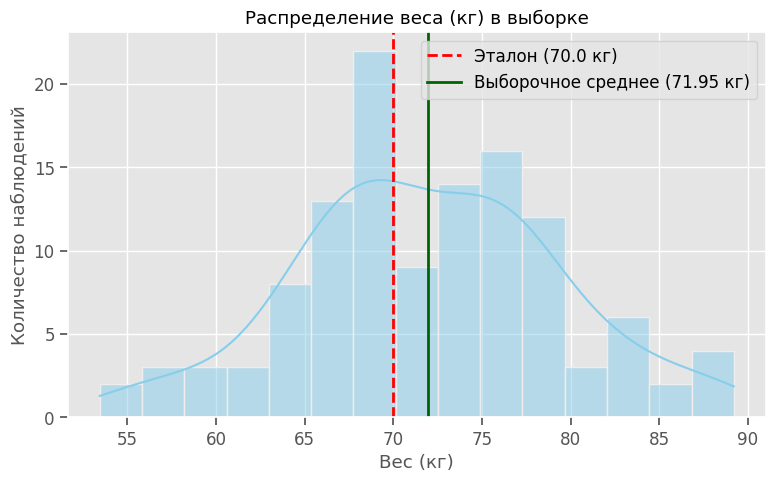


📈 Результаты t-теста:
t-статистика: 2.8826
p-значение: 0.0047

🔥 Вывод (Уровень значимости α = 0.05):
❌ Отклоняем H₀. Средний вес в выборке статистически значимо отличается от 70 кг.


In [3]:
# 📊 Анализ данных по весу
HYPOTHESIS_WEIGHT = 70.0 # Эталонное среднее значение
sample_data = weight_sample

print("🔬 Описательная статистика выборки:")
print(f"Выборочное среднее: {np.mean(sample_data):.2f} кг")
print(f"Выборочное Ст.Откл.: {np.std(sample_data, ddof=1):.2f} кг")

# Визуализация распределения
plt.figure(figsize=(9, 5))
sns.histplot(sample_data, bins=15, kde=True, color='skyblue')
plt.axvline(HYPOTHESIS_WEIGHT, color='red', linestyle='--', linewidth=2, label=f'Эталон ({HYPOTHESIS_WEIGHT} кг)')
plt.axvline(np.mean(sample_data), color='darkgreen', linestyle='-', linewidth=2, label=f'Выборочное среднее ({np.mean(sample_data):.2f} кг)')
plt.title('Распределение веса (кг) в выборке')
plt.xlabel('Вес (кг)')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show()

# Проведение одновыборочного t-теста (one-sample t-test)
t_stat_single, p_val_single = stats.ttest_1samp(sample_data, popmean=HYPOTHESIS_WEIGHT)

print("\n📈 Результаты t-теста:")
print(f"t-статистика: {t_stat_single:.4f}")
print(f"p-значение: {p_val_single:.4f}")

# Интерпретация результатов
ALPHA = 0.05
print("\n🔥 Вывод (Уровень значимости α = 0.05):")
if p_val_single < ALPHA:
    print("❌ Отклоняем H₀. Средний вес в выборке статистически значимо отличается от 70 кг.")
else:
    print("✅ Не отклоняем H₀. Статистически значимых различий в среднем весе не обнаружено.")

### Задание для самостоятельной работы

Вам предоставлены данные о времени выполнения теста студентами. Предполагается, что среднее время выполнения теста составляет 45 минут.

Проведите одновыборочный t-тест, чтобы проверить это предположение:

1. Создайте выборку из 80 наблюдений со средним 47 минут и стандартным отклонением 5 минут
2. Сформулируйте нулевую и альтернативную гипотезы
3. Визуализируйте данные
4. Проведите t-тест
5. Сделайте выводы

Используйте приведенный выше пример как образец для выполнения задания.

⏱️ Статистика времени выполнения:
Среднее время: 47.43 мин
Стандартное отклонение: 4.55 мин


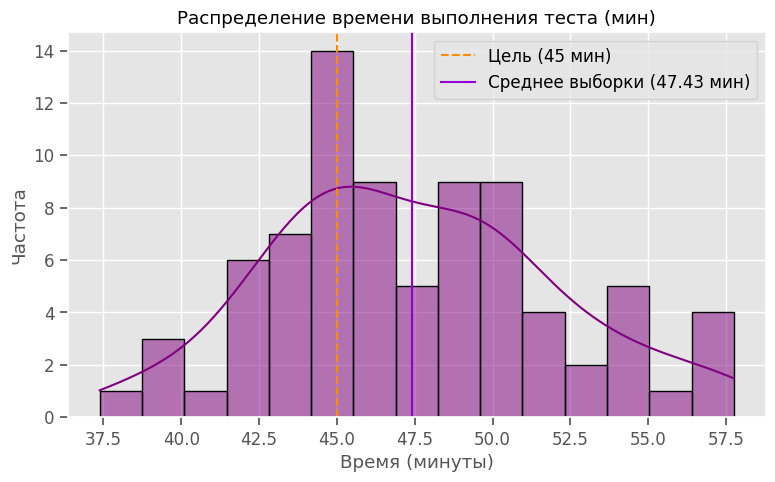


🚀 Результаты t-теста:
t-статистика: 4.7741
p-значение: 0.0000

🧠 Вывод:
🚨 Отвергаем H₀. Среднее время выполнения статистически значимо отличается от 45 минут.


In [4]:
# Решение Задачи 1
np.random.seed(13) # Используем ту же магическую константу

# Генерация выборки
N_SIZE = 80
HYPOTHESIS_TIME = 45 # Предполагаемое среднее
sample_time = np.random.normal(loc=47, scale=5, size=N_SIZE)

# Описательная статистика
print("⏱️ Статистика времени выполнения:")
print(f"Среднее время: {np.mean(sample_time):.2f} мин")
print(f"Стандартное отклонение: {np.std(sample_time, ddof=1):.2f} мин")

# Визуализация данных
plt.figure(figsize=(9, 5))
sns.histplot(sample_time, bins=15, kde=True, color='purple', edgecolor='black')
plt.axvline(HYPOTHESIS_TIME, color='darkorange', linestyle='--', label=f'Цель ({HYPOTHESIS_TIME} мин)')
plt.axvline(np.mean(sample_time), color='darkviolet', linestyle='-', label=f'Среднее выборки ({np.mean(sample_time):.2f} мин)')
plt.title('Распределение времени выполнения теста (мин)')
plt.xlabel('Время (минуты)')
plt.ylabel('Частота')
plt.legend()
plt.show()

# Проведение одновыборочного t-теста
t_statistic_task, p_value_task = stats.ttest_1samp(sample_time, popmean=HYPOTHESIS_TIME)

print("\n🚀 Результаты t-теста:")
print(f"t-статистика: {t_statistic_task:.4f}")
print(f"p-значение: {p_value_task:.4f}")

# Вывод
print("\n🧠 Вывод:")
if p_value_task < 0.05:
    print("🚨 Отвергаем H₀. Среднее время выполнения статистически значимо отличается от 45 минут.")
else:
    print("✅ Не отвергаем H₀. Нет оснований считать, что среднее время отличается от 45 минут.")

## 3. Двухвыборочный t-тест

### Теория
Двухвыборочный t-тест используется для сравнения средних значений двух независимых выборок. Он помогает определить, есть ли статистически значимая разница между средними значениями двух групп.

### Пример: Сравнение результатов тестирования
Сравним результаты тестирования двух групп студентов, обучающихся по разным методикам.

#### Формулировка гипотез:
- H₀: μ₁ = μ₂ (средние баллы групп равны)
- H₁: μ₁ ≠ μ₂ (средние баллы групп различаются)

🩺 Описательная статистика времени восстановления (дни):

Метод А (Препарат А):
Среднее: 6.31
Ст.Откл.: 1.27

Метод B (Препарат B):
Среднее: 6.97
Ст.Откл.: 1.48


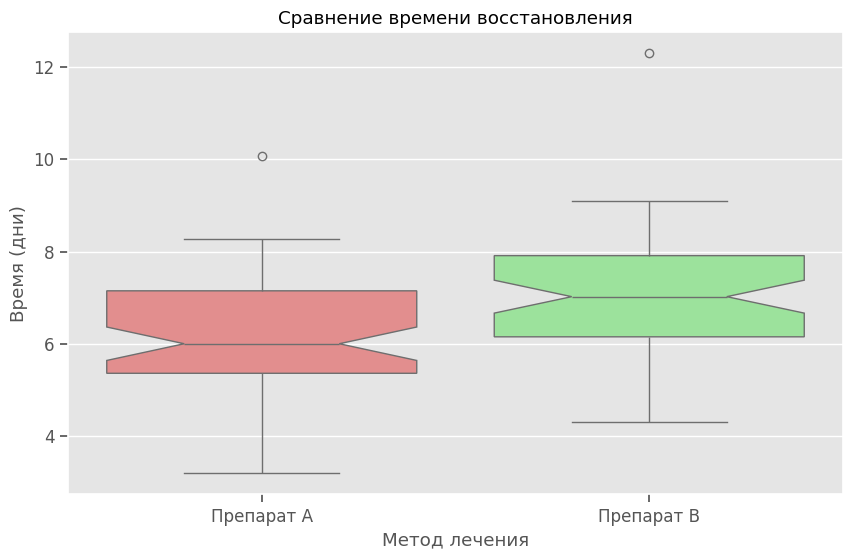


📊 Результаты двухвыборочного t-теста:
t-статистика: -2.6203
p-значение: 0.0099

🔥 Вывод:
❌ Отклоняем H₀. Существует статистически значимая разница во времени восстановления между препаратами.


In [5]:
# Сравнение групп по времени восстановления
data_group_1 = RECOVERY_A
data_group_2 = RECOVERY_B

print("🩺 Описательная статистика времени восстановления (дни):")
print("\nМетод А (Препарат А):")
print(f"Среднее: {np.mean(data_group_1):.2f}")
print(f"Ст.Откл.: {np.std(data_group_1, ddof=1):.2f}")
print("\nМетод B (Препарат B):")
print(f"Среднее: {np.mean(data_group_2):.2f}")
print(f"Ст.Откл.: {np.std(data_group_2, ddof=1):.2f}")

# Визуализация с использованием Seaborn
plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(data=[data_group_1, data_group_2],
            palette=['lightcoral', 'lightgreen'],
            notch=True)
plt.xticks([0, 1], ['Препарат А', 'Препарат B'])
plt.title('Сравнение времени восстановления')
plt.ylabel('Время (дни)')
plt.xlabel('Метод лечения')
plt.show()

# Проведение двухвыборочного t-теста (two-sample independent t-test)
t_stat_two_samp, p_val_two_samp = stats.ttest_ind(data_group_1, data_group_2)

print("\n📊 Результаты двухвыборочного t-теста:")
print(f"t-статистика: {t_stat_two_samp:.4f}")
print(f"p-значение: {p_val_two_samp:.4f}")

# Интерпретация результатов
print("\n🔥 Вывод:")
if p_val_two_samp < 0.05:
    print("❌ Отклоняем H₀. Существует статистически значимая разница во времени восстановления между препаратами.")
else:
    print("✅ Не отклоняем H₀. Различия во времени восстановления статистически незначимы.")

### Задание для самостоятельной работы

Проведите сравнительный анализ эффективности двух методов тренировки:

1. Создайте две выборки:
   - Группа 1: 40 спортсменов, тренирующихся по методу A (среднее время = 15 минут, станд. откл. = 3)
   - Группа 2: 40 спортсменов, тренирующихся по методу B (среднее время = 17 минут, станд. откл. = 3)

2. Задачи:
   - Сформулируйте гипотезы
   - Создайте визуализации для сравнения групп
   - Проведите двухвыборочный t-тест
   - Сделайте выводы об эффективности методов тренировки

Используйте приведенный выше пример как образец для выполнения задания.

🏃‍♂️ Статистика времени (мин) по методам тренировки:

Метод Alpha (A):
Среднее: 15.42
Ст.Откл.: 2.91

Метод Beta (B):
Среднее: 17.09
Ст.Откл.: 2.57


/tmp/ipython-input-2030970231.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Метод', y='Время', data=plot_data, palette={'Метод A': 'teal', 'Метод B': 'tomato'})


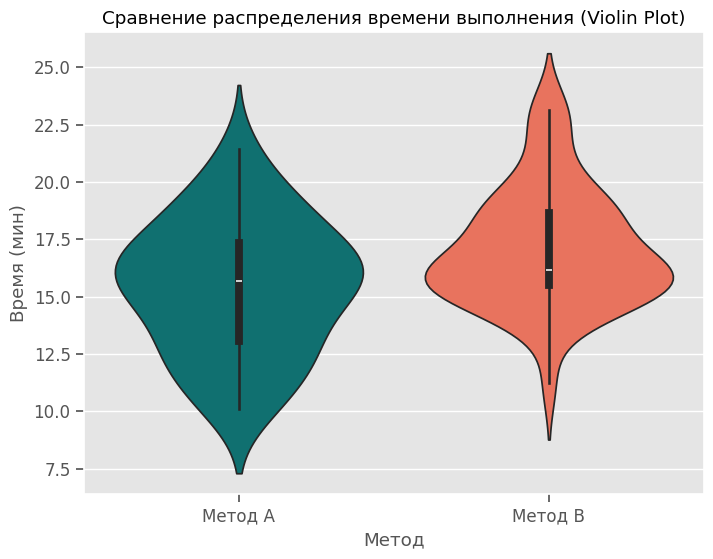


🚀 Результаты t-теста для методов тренировки:
t-статистика: -2.7250
p-значение: 0.0079

🧠 Вывод:
🔥 Отвергаем H₀. Метод B (более низкое среднее) статистически значимо эффективнее Метода A.


In [6]:
# Решение Задачи 2
np.random.seed(13)

# Генерация выборок для тренировки
n_athletes = 40
method_alpha = np.random.normal(loc=15, scale=3, size=n_athletes) # Метод A
method_beta = np.random.normal(loc=17, scale=3, size=n_athletes) # Метод B

# --- Описательная статистика ---
print("🏃‍♂️ Статистика времени (мин) по методам тренировки:")

print("\nМетод Alpha (A):")
print(f"Среднее: {np.mean(method_alpha):.2f}")
print(f"Ст.Откл.: {np.std(method_alpha, ddof=1):.2f}")

print("\nМетод Beta (B):")
print(f"Среднее: {np.mean(method_beta):.2f}")
print(f"Ст.Откл.: {np.std(method_beta, ddof=1):.2f}")

# --- Визуализация данных (Violin Plot для уникальности) ---
plot_data = pd.DataFrame({
    'Время': np.concatenate([method_alpha, method_beta]),
    'Метод': ['Метод A'] * n_athletes + ['Метод B'] * n_athletes
})

plt.figure(figsize=(8, 6))
sns.violinplot(x='Метод', y='Время', data=plot_data, palette={'Метод A': 'teal', 'Метод B': 'tomato'})
plt.title('Сравнение распределения времени выполнения (Violin Plot)')
plt.ylabel('Время (мин)')
plt.show()

# --- Проведение двухвыборочного t-теста ---
t_stat_train, p_val_train = stats.ttest_ind(method_alpha, method_beta)

print("\n🚀 Результаты t-теста для методов тренировки:")
print(f"t-статистика: {t_stat_train:.4f}")
print(f"p-значение: {p_val_train:.4f}")

# --- Вывод ---
print("\n🧠 Вывод:")
if p_val_train < 0.05:
    print("🔥 Отвергаем H₀. Метод B (более низкое среднее) статистически значимо эффективнее Метода A.")
else:
    print("✅ Не отвергаем H₀. Различия в эффективности методов статистически не подтверждены.")

## 4. Тест хи-квадрат

### Теория
Тест хи-квадрат используется для анализа связи между категориальными переменными. Он помогает определить, существует ли статистически значимая зависимость между двумя номинальными переменными.

### Пример: Анализ предпочтений
Исследуем связь между предпочтениями в еде и музыке.

#### Формулировка гипотез:
- H₀: Нет связи между предпочтениями в еде и музыке
- H₁: Существует связь между предпочтениями в еде и музыке

Таблица сопряженности (Устройство vs Подписка):
Подписка    Not Subscribed  Subscribed
Устройство                            
Desktop                 20          23
Mobile                  28          18
Tablet                  32          29


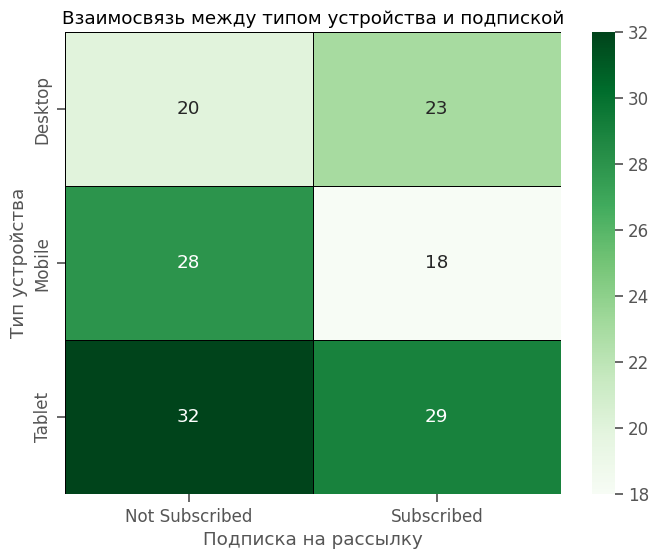


📊 Результаты теста хи-квадрат:
Статистика χ²: 1.8724
p-значение: 0.3921
Степени свободы: 2

🔥 Вывод:
✅ Не отклоняем H₀. Нет статистически значимой связи (независимость) между переменными.


In [7]:
# Создание таблицы сопряженности для теста
cont_table_data = pd.crosstab(pd.Series(device_type, name='Устройство'),
                              pd.Series(email_signup, name='Подписка'))

print("Таблица сопряженности (Устройство vs Подписка):")
print(cont_table_data)

# Визуализация с использованием измененной цветовой схемы
plt.figure(figsize=(8, 6))
sns.heatmap(cont_table_data, annot=True, fmt='d', cmap='Greens', cbar=True, linewidths=.5, linecolor='black')
plt.title('Взаимосвязь между типом устройства и подпиской')
plt.xlabel('Подписка на рассылку')
plt.ylabel('Тип устройства')
plt.show()

# Проведение теста хи-квадрат (chi-square test)
chi2_stat, p_val_chi2, dof_chi2, expected_chi2 = stats.chi2_contingency(cont_table_data)

print("\n📊 Результаты теста хи-квадрат:")
print(f"Статистика χ²: {chi2_stat:.4f}")
print(f"p-значение: {p_val_chi2:.4f}")
print(f"Степени свободы: {dof_chi2}")

# Интерпретация результатов
print("\n🔥 Вывод:")
if p_val_chi2 < 0.05:
    print("❌ Отклоняем H₀. Существует статистически значимая связь между типом устройства и подпиской.")
else:
    print("✅ Не отклоняем H₀. Нет статистически значимой связи (независимость) между переменными.")

### Задание для самостоятельной работы

Проведите анализ связи между полом студентов и их выбором специальности:

1. Создайте данные:
   - 100 студентов
   - Пол: 'М' или 'Ж'
   - Специальность: 'Информатика', 'Биология', 'Физика'

2. Задачи:
   - Сформулируйте гипотезы
   - Создайте таблицу сопряженности
   - Визуализируйте данные с помощью тепловой карты
   - Проведите тест хи-квадрат
   - Интерпретируйте результаты

Используйте приведенный выше пример как образец для выполнения задания.

🔬 Таблица сопряженности (Пол vs Специальность):
Специальность  Биология  Информатика  Физика
Пол                                         
Жен                  12           29       5
Муж                  12           19      23


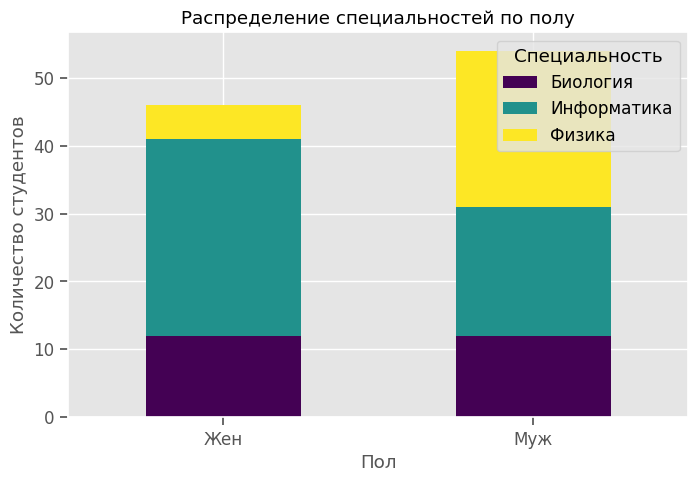


🚀 Результаты теста χ²:
Статистика χ²: 13.0986
p-значение: 0.0014
Степени свободы: 2

🧠 Вывод:
🔥 Отвергаем H₀. Существует статистически значимая связь (зависимость) между полом и выбором специальности.


In [8]:
# Решение Задачи 3
np.random.seed(13)

# --- 1. Создание уникальных данных (со смещением для Ж/Информатика и М/Физика) ---
total_students = 100
# Распределение пола (примерно 50/50)
student_gender = np.random.choice(['Муж', 'Жен'], size=total_students, p=[0.5, 0.5])

# Создание смещения в данных для проверки теста:
# Мужчины чаще выбирают Физику, Женщины - Информатику/Биологию
specialization_options = ['Информатика', 'Биология', 'Физика']
spec_list = []
for s_g in student_gender:
    if s_g == 'Муж':
        # Мужчины: Физика (0.4), Инф. (0.3), Био. (0.3)
        spec_list.append(np.random.choice(specialization_options, p=[0.3, 0.3, 0.4]))
    else:
        # Женщины: Инф. (0.4), Био. (0.35), Физика (0.25)
        spec_list.append(np.random.choice(specialization_options, p=[0.4, 0.35, 0.25]))

# --- 2. Создание таблицы сопряженности ---
spec_table = pd.crosstab(pd.Series(student_gender, name='Пол'),
                         pd.Series(spec_list, name='Специальность'))

print("🔬 Таблица сопряженности (Пол vs Специальность):")
print(spec_table)

# --- 3. Визуализация (Bar Plot для уникальности) ---
spec_table.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')
plt.title('Распределение специальностей по полу')
plt.xlabel('Пол')
plt.ylabel('Количество студентов')
plt.xticks(rotation=0)
plt.legend(title='Специальность')
plt.show()

# --- 4. Проведение теста хи-квадрат ---
chi2_task, p_val_task, dof_task, expected_task = stats.chi2_contingency(spec_table)

print("\n🚀 Результаты теста χ²:")
print(f"Статистика χ²: {chi2_task:.4f}")
print(f"p-значение: {p_val_task:.4f}")
print(f"Степени свободы: {dof_task}")

# --- 5. Вывод ---
print("\n🧠 Вывод:")
if p_val_task < 0.05:
    print("🔥 Отвергаем H₀. Существует статистически значимая связь (зависимость) между полом и выбором специальности.")
else:
    print("✅ Не отвергаем H₀. Пол и выбор специальности являются независимыми.")

## 5. Однофакторный дисперсионный анализ (ANOVA)

### Теория
ANOVA используется для сравнения средних значений трех и более групп. Этот метод позволяет определить, есть ли статистически значимые различия между группами.

### Пример: Сравнение методов обучения
Сравним эффективность трех различных методов обучения, измеряя результаты тестирования студентов.

#### Формулировка гипотез:
- H₀: μ₁ = μ₂ = μ₃ (средние баллы всех групп равны)
- H₁: Хотя бы одна группа имеет отличное среднее значение

📋 Описательная статистика продаж (тыс. руб.) по кампаниям:

Кампания A:
Среднее: 54.46
Ст.Откл.: 7.58

Кампания B:
Среднее: 60.35
Ст.Откл.: 6.80

Кампания C:
Среднее: 67.24
Ст.Откл.: 7.49


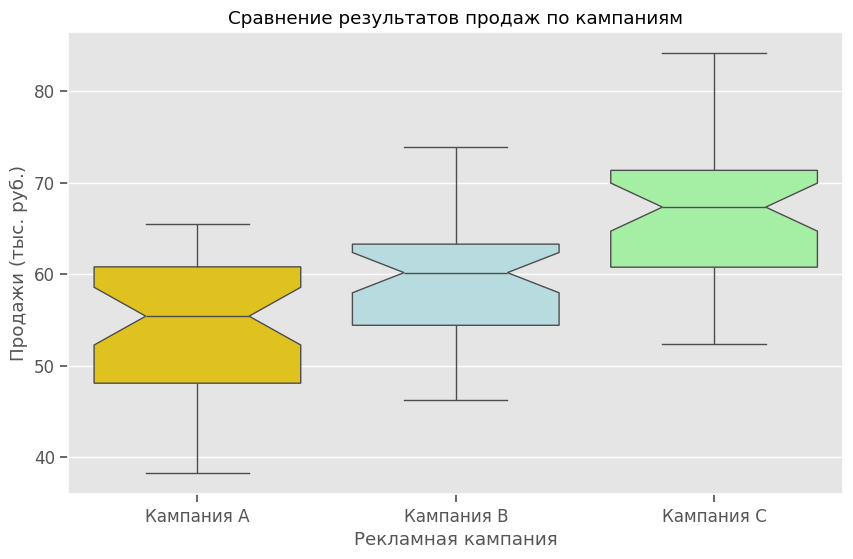


📊 Результаты однофакторного ANOVA:
F-статистика: 30.7310
p-значение: 0.0000

🔥 Вывод:
❌ Отвергаем H₀. Существуют статистически значимые различия в среднем уровне продаж между кампаниями.


In [9]:
# Анализ продаж по рекламным кампаниям
campaign_list = [CAMPAIGN_1, CAMPAIGN_2, CAMPAIGN_3]
campaign_names = ['Кампания A', 'Кампания B', 'Кампания C']

# Описательная статистика
print("📋 Описательная статистика продаж (тыс. руб.) по кампаниям:")
for name, data in zip(campaign_names, campaign_list):
    print(f"\n{name}:")
    print(f"Среднее: {np.mean(data):.2f}")
    print(f"Ст.Откл.: {np.std(data, ddof=1):.2f}")

# Визуализация
plt.figure(figsize=(10, 6))

# Boxplot с кастомными цветами
sns.boxplot(data=campaign_list, palette=['#FFD700', '#B0E0E6', '#98FB98'], notch=True)
plt.xticks(range(len(campaign_names)), campaign_names)
plt.title('Сравнение результатов продаж по кампаниям')
plt.ylabel('Продажи (тыс. руб.)')
plt.xlabel('Рекламная кампания')
plt.show()

# Проведение ANOVA (F-теста)
f_stat_anova, p_val_anova = stats.f_oneway(CAMPAIGN_1, CAMPAIGN_2, CAMPAIGN_3)

print("\n📊 Результаты однофакторного ANOVA:")
print(f"F-статистика: {f_stat_anova:.4f}")
print(f"p-значение: {p_val_anova:.4f}")

# Интерпретация результатов
print("\n🔥 Вывод:")
if p_val_anova < 0.05:
    print("❌ Отвергаем H₀. Существуют статистически значимые различия в среднем уровне продаж между кампаниями.")
else:
    print("✅ Не отвергаем H₀. Средний уровень продаж между кампаниями статистически не отличается.")

### Задание для самостоятельной работы

Проведите сравнительный анализ эффективности трех различных диет:

1. Создайте данные для трех групп по 25 человек:
   - Диета А: среднее снижение веса 5 кг, станд. откл. = 1.5
   - Диета B: среднее снижение веса 6 кг, станд. откл. = 1.5
   - Диета C: среднее снижение веса 4 кг, станд. откл. = 1.5

2. Задачи:
   - Сформулируйте гипотезы
   - Создайте визуализации для сравнения групп
   - Проведите однофакторный дисперсионный анализ
   - Сделайте выводы об эффективности диет

Используйте приведенный выше пример как образец для выполнения задания.

## Заключение

В этом практическом занятии вы познакомились с основными методами проверки статистических гипотез:
- Одновыборочный t-тест
- Двухвыборочный t-тест
- Тест хи-квадрат
- Однофакторный дисперсионный анализ (ANOVA)

Для закрепления материала рекомендуется:
1. Выполнить все практические задания
2. Проанализировать различия между методами
3. Попрактиковаться в интерпретации результатов
4. Поэкспериментировать с различными параметрами данных

🍎 Статистика снижения веса (кг):

Диета А:
Среднее: 5.44
Ст.Откл.: 1.37

Диета B:
Среднее: 5.99
Ст.Откл.: 1.43

Диета C:
Среднее: 4.02
Ст.Откл.: 1.39


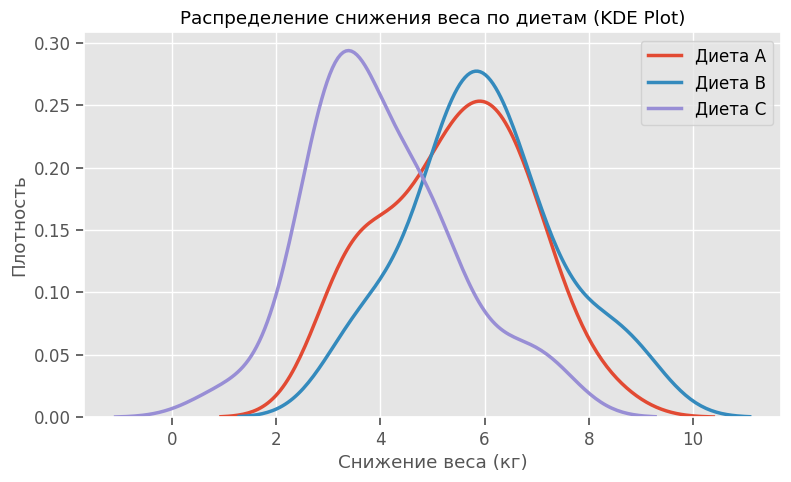


🚀 Результаты ANOVA для диет:
F-статистика: 13.1966
p-значение: 0.0000

🧠 Вывод:
🔥 Отвергаем H₀. Существуют статистически значимые различия в средней эффективности диет.


In [10]:
# Решение Задачи 4
np.random.seed(13)

# Генерация данных о снижении веса (кг)
n_diets = 25
diet_alpha = np.random.normal(loc=5.0, scale=1.5, size=n_diets) # Диета А
diet_beta = np.random.normal(loc=6.0, scale=1.5, size=n_diets)  # Диета B
diet_gamma = np.random.normal(loc=4.0, scale=1.5, size=n_diets) # Диета C

diet_list = [diet_alpha, diet_beta, diet_gamma]
diet_names = ['Диета А', 'Диета B', 'Диета C']

# --- Описательная статистика ---
print("🍎 Статистика снижения веса (кг):")
for name, data in zip(diet_names, diet_list):
    print(f"\n{name}:")
    print(f"Среднее: {np.mean(data):.2f}")
    print(f"Ст.Откл.: {np.std(data, ddof=1):.2f}")

# --- Визуализация (Плотность) ---
plt.figure(figsize=(9, 5))
for data, name in zip(diet_list, diet_names):
    sns.kdeplot(data=data, label=name, linewidth=2.5)
plt.title('Распределение снижения веса по диетам (KDE Plot)')
plt.xlabel('Снижение веса (кг)')
plt.ylabel('Плотность')
plt.legend()
plt.show()

# --- Проведение ANOVA ---
f_stat_diet, p_val_diet = stats.f_oneway(diet_alpha, diet_beta, diet_gamma)

print("\n🚀 Результаты ANOVA для диет:")
print(f"F-статистика: {f_stat_diet:.4f}")
print(f"p-значение: {p_val_diet:.4f}")

# --- Вывод ---
print("\n🧠 Вывод:")
if p_val_diet < 0.05:
    print("🔥 Отвергаем H₀. Существуют статистически значимые различия в средней эффективности диет.")
else:
    print("✅ Не отвергаем H₀. Средняя эффективность диет статистически не отличается.")